In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
gme = pd.read_csv('./gme.csv')
gme_labels = pd.read_csv('./gme_labels.csv',header=None)
gme_labels.columns=['Label','date']
gme_labels.drop(columns='date',inplace=True)
columns = ['Year','Year_Week','Week_Number','Day', 'Weekday','Open','Adj Close',
           'Return']
gme = gme[columns]
gme45 = gme[(gme.Year==2020)|(gme.Year==2021)]
dict_labs = dict(zip(gme45.Year_Week.unique(),gme_labels.Label))
gme45 = gme45.assign(Label=[dict_labs[y_w] for y_w in gme45.Year_Week])

In [3]:
gme_weekly_return = pd.read_csv('./gme_weekly_return_volatility.csv')
y = gme_weekly_return.Year
gme_wr = gme_weekly_return[np.where((y==2020)|(y==2021),True,False)]
gme_wr['Label']=[v for val in gme_labels.values for v in val]
gme_wr

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_64338/2628832985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme_wr['Label']=[v for val in gme_labels.values for v in val]


,Year,Week_Number,mean_return,volatility,Label
158,2020,0,-1.5160,7.493918,Red
159,2020,1,-1.5324,3.426839,Red
160,2020,2,-2.4704,6.280646,Red
161,2020,3,-2.3000,3.391904,Red
162,2020,4,-2.3190,1.496155,Red
...,...,...,...,...,...
258,2021,48,-2.8324,4.045923,Red
259,2021,49,-1.4430,6.241354,Red
260,2021,50,-0.0922,8.972470,Red
261,2021,51,-0.5565,1.666374,Red


In [4]:
gme_wr_2020 = gme_wr.query('Year == 2020')
gme_wr_2021 = gme_wr.query('Year == 2021')

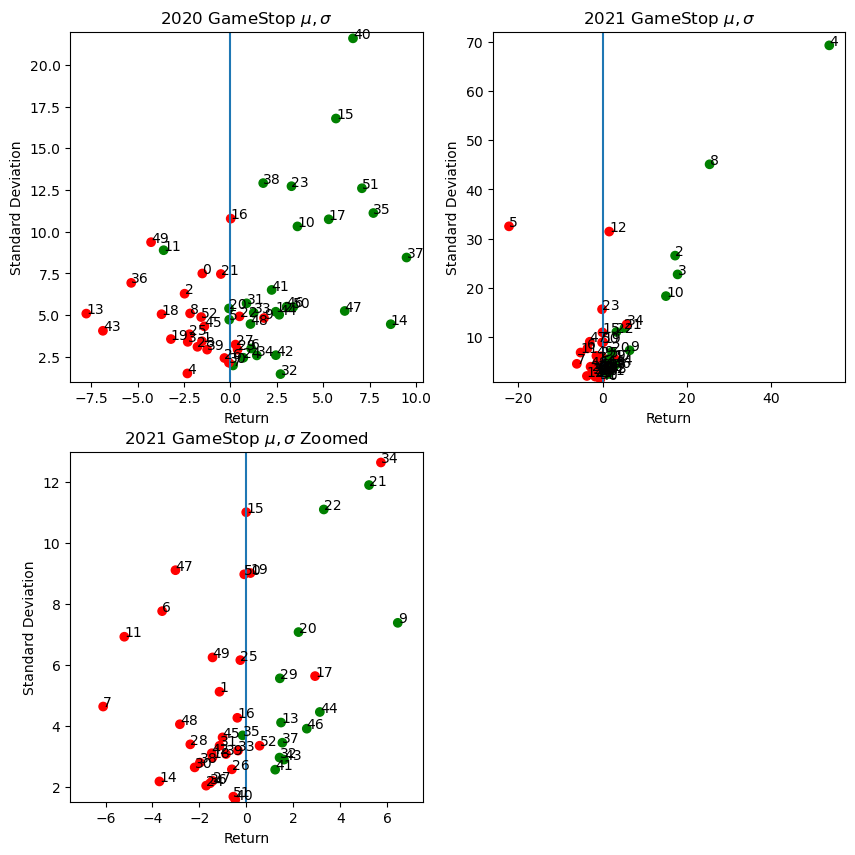

In [5]:

# for i in range(0,53):
#     plt.annotate(gme_wr.iloc[i,1],(gme_wr.iloc[i,2],gme_wr.iloc[i,3]),rotation=0)
# plt.xlabel("Return");plt.ylabel('Standard Deviation');
# plt.title('2020 GameStop Weekly Return, Standard Deviation, and Label')
# plt.savefig('./GME_2020_R_SD')
fig = plt.figure(1,figsize=(10,10))
plt.subplot(221)
plt.scatter(data=gme_wr_2020, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,23])
for i in range(0,53):
    plt.annotate(gme_wr.iloc[i,1],(gme_wr.iloc[i,2],gme_wr.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2020 GameStop $\mu, \sigma$')
plt.savefig('./GME_2020_R_SD')
plt.ylim(1,22)

plt.subplot(222)
plt.scatter(data=gme_wr_2021, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,72])
for i in range(0,52):
    plt.annotate(gme_wr_2021.iloc[i,1],
                 (gme_wr_2021.iloc[i,2],gme_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2021 GameStop $\mu, \sigma$')
plt.ylim(1,72)
plt.savefig('./GME_2021_R_SD_Broad_View')
plt.subplot(223)
plt.scatter(data=gme_wr_2021, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,13])
for i in range(0,52):
    plt.annotate(gme_wr_2021.iloc[i,1],
                 (gme_wr_2021.iloc[i,2],gme_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2021 GameStop $\mu, \sigma$ Zoomed')
plt.xlim(-7.5,7.5)
plt.ylim(1.5,13)
plt.savefig('./gme_plot')

In [6]:
gme_wr_2021.shape

(52, 5)

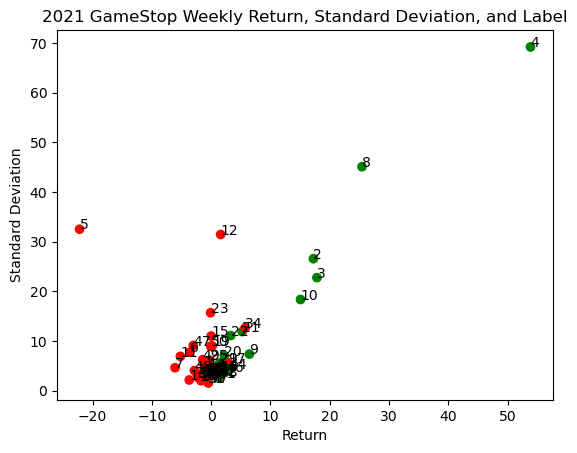

In [7]:
plt.scatter(data=gme_wr_2021, x='mean_return', y='volatility',c='Label')
for i in range(0,52):
    plt.annotate(gme_wr_2021.iloc[i,1],
                 (gme_wr_2021.iloc[i,2],gme_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2021 GameStop Weekly Return, Standard Deviation, and Label')
plt.savefig('./GME_2021_R_SD_Broad_View')

(0.0, 13.0)

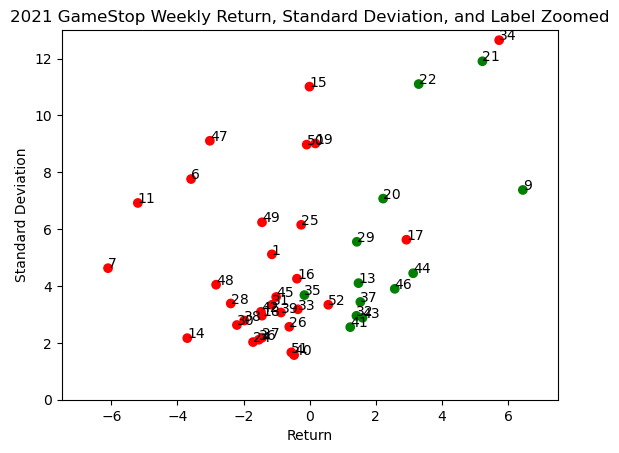

In [8]:
plt.scatter(data=gme_wr_2021, x='mean_return', y='volatility',c='Label')
for i in range(0,52):
    plt.annotate(gme_wr_2021.iloc[i,1],
                 (gme_wr_2021.iloc[i,2],gme_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2021 GameStop Weekly Return, Standard Deviation, and Label Zoomed')
plt.xlim(-7.5,7.5)
plt.ylim(0,13)

In [9]:
gme2021 = gme45.query('Year==2021')

In [10]:
gme2021.index = range(gme2021.shape[0])

In [11]:
gme2021[gme2021['Week_Number']==1]

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Label
0,2021,2021-01,1,4,Monday,4.75,4.31,-0.084395,Red
1,2021,2021-01,1,5,Tuesday,4.34,4.34,0.006957,Red
2,2021,2021-01,1,6,Wednesday,4.34,4.59,0.056995,Red
3,2021,2021-01,1,7,Thursday,4.62,4.52,-0.015251,Red
4,2021,2021-01,1,8,Friday,4.55,4.42,-0.021571,Red


In [12]:
def buy_and_hold(stock):
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Open'].values.astype(float))[0]

weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday']

def min_weekday(days):
    for day in weekdays:
        if day in days:
            return day
        continue

def max_weekday(days):
    for day in weekdays[::-1]:
        if day in days:
            return day
        continue

max_weekday(['Tuesday','Wednesday'])

In [13]:
gme2021.columns

Index(['Year', 'Year_Week', 'Week_Number', 'Day', 'Weekday', 'Open',
       'Adj Close', 'Return', 'Label'],
      dtype='object')

In [14]:
def trade_from_open_close(stock):
    '''Return a dataframe with weekly return factors based on first day of week
    open and last day of week close'''
    stock_by_week = pd.DataFrame(
        columns=['Year','Week_Number',"Open","Adj Close", 'Return', "Label"])
    y = stock.Year.unique()[0]
    
    for inx, week_num in enumerate(stock["Week_Number"].unique()):
        this_week = stock[stock["Week_Number"]==week_num]
        o = this_week.head(1)['Open'].values[0]
        ac = this_week.tail(1)['Adj Close'].values[0]
        r = 1+(ac-o)/o
        l = this_week.head(1)['Label'].values[0]
        stock_by_week.loc[inx,:] = [y,week_num,o,ac,r,l]
    return stock_by_week

In [15]:
gme_sbw = trade_from_open_close(gme2021)

Cumulative returns: Buy open, Sell Close, Trade Green.  138.15x return

In [16]:
labels = gme_sbw.Label
returns = gme_sbw.Return
trade_green = np.round(100*np.cumprod(np.where(labels=='Green',
                             returns.values.astype(float),1)),2)
trade_all_weeks = np.round(100*np.cumprod(returns.values.astype(float)),2)
trade_green,trade_all_weeks,buy_and_hold(gme2021)

(array([  100.  ,   183.09,   286.36,   962.22,   962.22,   962.22,
          962.22,  2096.77,  2762.54,  4717.44,  4717.44,  4717.44,
         4996.17,  4996.17,  4996.17,  4996.17,  4996.17,  4996.17,
         4996.17,  5526.29,  6977.01,  7421.66,  7421.66,  7421.66,
         7421.66,  7421.66,  7421.66,  7421.66,  8196.  ,  8196.  ,
         8196.  ,  8774.8 ,  8774.8 ,  8774.8 ,  8678.91,  8678.91,
         9180.59,  9180.59,  9180.59,  9180.59,  9726.11,  9726.11,
        10536.82, 12310.27, 12310.27, 13814.94, 13814.94, 13814.94,
        13814.94, 13814.94, 13814.94, 13814.94]),
 array([ 93.05, 170.37, 266.46, 895.37, 180.34, 130.52, 100.67, 219.37,
        289.02, 493.55, 356.18, 314.12, 332.68, 308.08, 301.38, 265.17,
        304.94, 276.83, 274.43, 303.55, 383.24, 407.66, 368.66, 333.37,
        321.94, 309.13, 289.8 , 255.94, 282.65, 252.5 , 236.54, 253.24,
        250.6 , 316.27, 312.81, 288.79, 305.48, 282.82, 269.13, 264.11,
        279.8 , 259.68, 281.32, 328.67, 312.65

In [17]:
def buy_hold_weekly(stock):
    tail_ac = []
    o = stock.head(1)['Open']
    for wk in sorted(stock['Week_Number'].unique()):
        ac = stock[stock["Week_Number"] == \
                              wk].tail(1)['Adj Close'].values[0]
        tail_ac.append(ac)
    r = np.array(tail_ac)/o.values[0]
    return r

In [19]:
bh_weekly = np.round(100*buy_hold_weekly(gme2021),2)
bh_weekly

array([  93.05,  186.95,  342.11, 1710.53,  335.58,  275.79,  213.68,
        535.37,  725.05, 1392.  , 1054.11,  952.63, 1007.58,  833.47,
        814.11,  795.58,  913.68,  848.  ,  841.68,  930.53, 1168.42,
       1307.16, 1228.  , 1125.47, 1102.74, 1067.58, 1006.53,  889.68,
        949.26,  848.  ,  798.74,  855.37,  838.53, 1078.74, 1067.16,
       1002.11, 1078.74,  974.53,  931.16,  908.84,  964.63,  893.68,
        965.89, 1122.32, 1063.79, 1204.21, 1051.16,  907.37,  836.84,
        819.16,  800.63,  817.47])

From above, a \\$100 portfolio kept in the market on green weeks would accumulate to \\$13,814.94, while a portfolio that trades on all weeks would accumulate to $242.24.  Meanwhile, a simple buy and hold approach that does not miss weekend trading would accumulate to \\$817.47, which highlights the importance here of being invested between the Friday close and the Monday open.

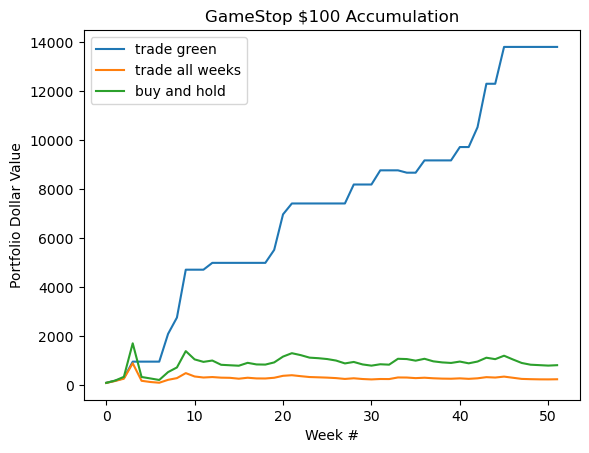

In [20]:
plt.plot(range(len(trade_green)),trade_green,
        range(len(trade_all_weeks)),trade_all_weeks,
        range(len(bh_weekly)),bh_weekly)
plt.legend(['trade green','trade all weeks','buy and hold'])
plt.xlabel('Week #')
plt.ylabel('Portfolio Dollar Value')
plt.title('GameStop $100 Accumulation')
plt.savefig('./gme_100_accumulation.jpg')